In [1]:
#import the datasets and do the data processing

In [2]:
#problem statement
# develop a sentiment analysis model to classify reviews as positive or negative 
# preprocessing the reviews text using techniques such as lower casting,removing stop words and lemmatization
# use the trained  model accurately predict the sentiment of new,unseen  reviews

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Reviews.csv')

In [3]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [4]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
data.info() # data set into like data types,entriew of data sets,memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().sum() # checking the null values

Review    0
Liked     0
dtype: int64

In [7]:
data.duplicated() # check the duplicated values

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
from wordcloud import WordCloud

In [11]:
combined_text="".join(data['Review']) # combine all review into one string

In [12]:
wordcloud = WordCloud(width=800 , height=400 , background_color='white').generate(combined_text)

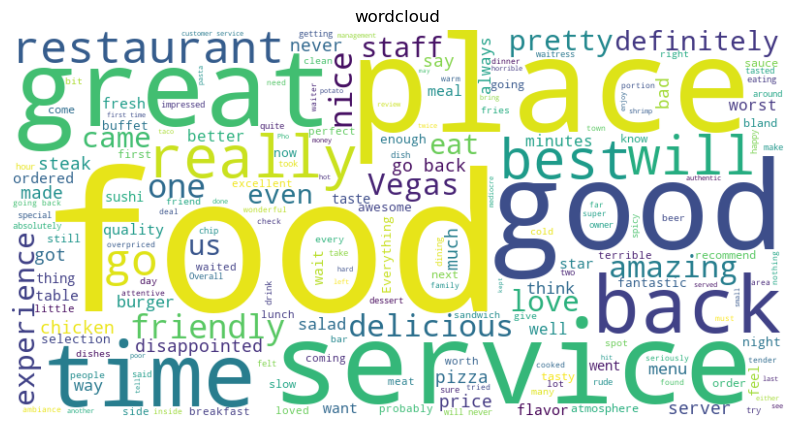

In [13]:
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('wordcloud')
plt.show()

In [14]:
from collections import Counter

In [15]:
targeted_words=['good','great','amazing','bad','not bad']
all_words="".join(data['Review']).lower().split()
word_counts=Counter(all_words)
target_word_count={word:word_counts[word] for word in targeted_words}

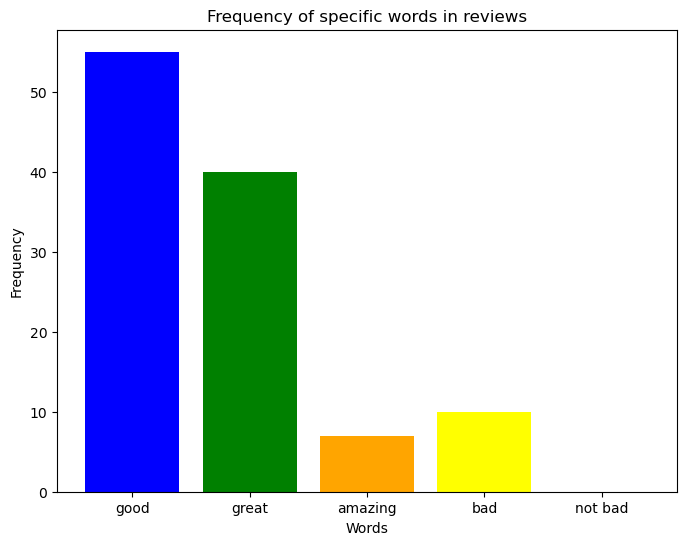

In [16]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(),target_word_count.values() ,color=['blue','green','orange','yellow'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [17]:
#text preprocessing

In [18]:
#converting a dataset into lower case
lowercased_text=data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [19]:
#tokenization
#Tokenization is the processof breaking down a piece of text into smaller units called tokens
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kambo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
data['Tokens']=data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [22]:
#Removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kambo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop_words=set(stopwords.words('english'))

In [24]:
data['Tokens']=data['Review'].apply(lambda x:[word for word in word_tokenize(x) if word not in stop_words])

In [25]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [26]:
#stemming
#Stemming is the process of reducing words to its base form
from nltk.stem import PorterStemmer

In [27]:
stemmer=PorterStemmer()

In [28]:
data['stemmed'] = data['Review'].apply(lambda x:" ".join(stemmer.stem(word) for word in word_tokenize(x)))

In [29]:
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [30]:
data['stemmed'].value_counts()

stemmed
# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

In [31]:
#Lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kambo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


In [33]:
lemmatizer=WordNetLemmatizer()

In [34]:
data['Lemmatized']=data['Review'].apply(lambda x:' '.join([lemmatizer.lemmatize(word ,pos = wordnet.VERB) for word in word_tokenize(x)]))

In [35]:
print(data['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [36]:
# remove the numbers 
import re
data['No_Numbers']=data['Review'].apply(lambda x:re.sub(r'\d+',' ',x))

In [37]:
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [38]:
data['cleaned_text']=data['Review'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s]',' ',x))

In [39]:
print(data['cleaned_text'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   Lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [41]:
!pip install contractions
import contractions
data['Expanded']=data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [42]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [43]:
import emoji
data['Emoji']=data['Review'].apply(emoji.demojize)

In [44]:
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [45]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [46]:
from bs4 import BeautifulSoup

In [47]:
data['cleaned']=data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

C:\Users\kambo\AppData\Local\Temp\ipykernel_19112\3259983302.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned']=data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())


In [48]:
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [49]:
#TF IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(data['Review'])

In [50]:
print(x.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
#Building machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [52]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(data['Review'])
y=data['Liked']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2,random_state=42)

In [54]:
print(x_train,x_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [55]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [56]:
y_pred=model.predict(x_test)

In [57]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [58]:
print(f'Accuracy:{accuracy}')
print('Classsification Report')
print(report)

Accuracy:0.8
Classsification Report
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [ ]:
#predict sentiment for new review
def predict_sentiment(new_review):
    cleaned_review=preprocess_text(new_review)
    x_new=vectorizer.transform([cleaned_review])
    return model.predict(x_new[0])

In [ ]:
new_reviews=input("Enter a review")


In [ ]:
for review in new_reviews:
    sentiment=predict_sentiment(review)
    sentiment_label='Positive' if sentiment==1 else 'Negative'
    print(f"Review:'{review}'\nPredicted sentiment:{sentiment_label}\n)